## Comparing cloud cover and cloud area fraction

(Requires 180GB)

In [32]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [20]:
import matplotlib

# Increase the general font size in plots
size_plots_label = 16
matplotlib.rcParams['legend.fontsize'] = size_plots_label
matplotlib.rcParams['axes.labelsize'] = size_plots_label # For an axes xlabel and ylabel
matplotlib.rcParams['axes.titlesize'] = size_plots_label+2 # For an axes xlabel and ylabel
matplotlib.rcParams['xtick.labelsize'] = size_plots_label
matplotlib.rcParams['ytick.labelsize'] = size_plots_label

### QUBICC data

In [2]:
# R02B05 cloud area fraction and cloud cover
path_qubicc_area_R02B05 = '/pf/b/b309170/my_work/QUBICC/data_var_vertinterp_R02B05/cl_area'
path_qubicc_cover_R02B05 = '/pf/b/b309170/my_work/QUBICC/data_var_vertinterp_R02B05/cl'

# R02B04 cloud area fraction and cloud cover
path_qubicc_area_R02B04 = '/pf/b/b309170/my_work/QUBICC/data_var_vertinterp/cl_area'
path_qubicc_cover_R02B04 = '/pf/b/b309170/my_work/QUBICC/data_var_vertinterp/cl'

R02B04

In [8]:
files=os.listdir(path_qubicc_area_R02B04)

DS = xr.open_mfdataset(path_qubicc_area_R02B04+'/*.nc', combine='by_coords')
cl_area_R02B04 = DS.cl.values

In [9]:
cl_area_R02B04.shape

(2163, 31, 20480)

In [10]:
files=os.listdir(path_qubicc_cover_R02B04)

DS = xr.open_mfdataset(path_qubicc_cover_R02B04+'/*.nc', combine='by_coords')
cl_cover_R02B04 = DS.cl.values

In [11]:
cl_cover_R02B04.shape

(2163, 31, 20480)

R02B05

In [12]:
files=os.listdir(path_qubicc_area_R02B05)

DS = xr.open_mfdataset(path_qubicc_area_R02B05+'/*.nc', combine='by_coords')
cl_area_R02B05 = DS.cl.values

In [13]:
cl_area_R02B05.shape

(2163, 31, 81920)

In [14]:
files=os.listdir(path_qubicc_cover_R02B05)

DS = xr.open_mfdataset(path_qubicc_cover_R02B05+'/*.nc', combine='by_coords')
cl_cover_R02B05 = DS.cl.values

In [15]:
cl_cover_R02B05.shape

(2163, 31, 81920)

Remove the first timestep (cloud cover/area is 0 everywhere) and the vertical layers above 21km

In [16]:
cl_cover_R02B04 = cl_cover_R02B04[1:, 4:, :]
cl_cover_R02B05 = cl_cover_R02B05[1:, 4:, :]
cl_area_R02B04 = cl_area_R02B04[1:, 4:, :]
cl_area_R02B05 = cl_area_R02B05[1:, 4:, :]

Remove nans

In [17]:
not_nan = ~np.isnan(cl_cover_R02B04[0,-1,:])
cl_cover_R02B04_not_nan = cl_cover_R02B04[:,:,not_nan]
cl_area_R02B04_not_nan = cl_area_R02B04[:,:,not_nan]

not_nan = ~np.isnan(cl_cover_R02B05[0,-1,:])
cl_cover_R02B05_not_nan = cl_cover_R02B05[:,:,not_nan]
cl_area_R02B05_not_nan = cl_area_R02B05[:,:,not_nan]

In [18]:
data = [cl_cover_R02B04_not_nan, cl_cover_R02B05_not_nan, 
        cl_area_R02B04_not_nan, cl_area_R02B05_not_nan]

for datum in data:
    print(np.sum(np.isnan(datum)))

0
0
0
0


#### Plotting means

Note that we cannot compare the cloud area and cloud fraction on the lower-most layer (see #116 on GitLab).
The reason is that the grid cells on the lowermost layer have noticeably different heights on the R02B04-grid I used for the cloud area fraction and the R02B04-grid I used for the cloud cover.

In [19]:
cl_cover_R02B04_not_nan_mean = np.mean(cl_cover_R02B04_not_nan, (0, 2))
cl_cover_R02B05_not_nan_mean = np.mean(cl_cover_R02B05_not_nan, (0, 2))
cl_area_R02B04_not_nan_mean = np.mean(cl_area_R02B04_not_nan, (0, 2))
cl_area_R02B05_not_nan_mean = np.mean(cl_area_R02B05_not_nan, (0, 2))

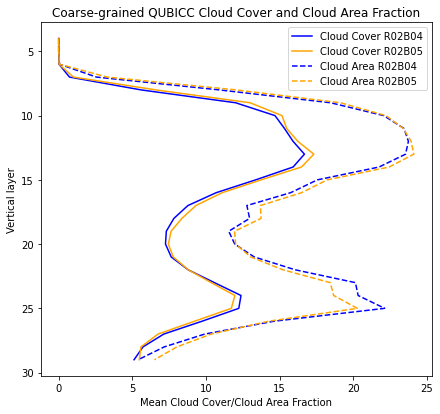

In [15]:
# Not plotting the lower-most layer
a = np.linspace(4, 29, 26)

fig = plt.figure(figsize=(7,6.5))
ax = fig.add_subplot(111, xlabel='Mean Cloud Cover/Cloud Area Fraction in percent', ylabel='Vertical layer', 
                     title='Coarse-grained QUBICC Cloud Cover and Cloud Area Fraction')
ax.plot(100*cl_cover_R02B04_not_nan_mean[:-1], a, color='blue')
ax.plot(100*cl_cover_R02B05_not_nan_mean[:-1], a, color='orange')
ax.plot(100*cl_area_R02B04_not_nan_mean[:-1], a, '--', color='blue')
ax.plot(100*cl_area_R02B05_not_nan_mean[:-1], a, '--', color='orange')
plt.gca().invert_yaxis()
ax.legend(['Cloud Cover R02B04', 'Cloud Cover R02B05', 'Cloud Area R02B04', 'Cloud Area R02B05'])
fig.savefig('coarse-grained_QUBICC_Cloud_Cover_and_Cloud_Area.pdf')

#### Mean altitude of a vertical layer as y-axis

In [20]:
#Load R02B04 height grids
path_heights_cover_R02B04 = '/pf/b/b309170/my_work/QUBICC/grids/zg_icon-a_capped.nc'

#Load R02B05 height grids
path_heights_cover_R02B05 = '/pf/b/b309170/my_work/QUBICC/grids/zg_icon-a_capped_R02B05.nc'

path_heights_cloud_area = '/pf/b/b309170/bd1179_work/qubicc/grids/zg_icon-a_capped_upsampled_R02B05_QUBICC.nc'

In [21]:
DS = xr.open_dataset(path_heights_cover_R02B04)
heights_cover_R02B04 = DS.zg.values
heights_cover_R02B04.shape

(31, 20480)

In [22]:
DS = xr.open_dataset(path_heights_cover_R02B05)
heights_cover_R02B05 = DS.zg.values
heights_cover_R02B05.shape

(31, 81920)

In [23]:
DS = xr.open_dataset(path_heights_cloud_area)
heights_cloud_area = DS.zg.values
heights_cloud_area.shape

(31, 20971520)

In [24]:
heights_cloud_area_mean = np.mean(heights_cloud_area[4:, :], axis=1)
heights_cover_R02B04_mean = np.mean(heights_cover_R02B04[4:, :], axis=1)
heights_cover_R02B05_mean = np.mean(heights_cover_R02B05[4:, :], axis=1)

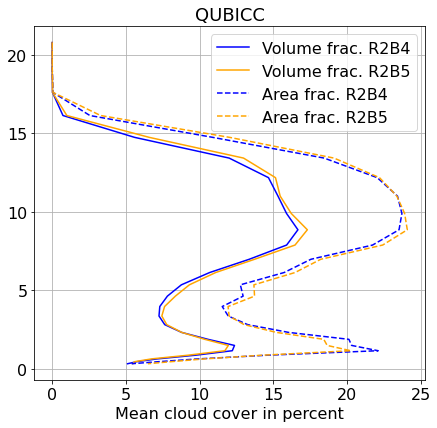

In [22]:
fig = plt.figure(figsize=(7,6.5))
ax = fig.add_subplot(111, xlabel='Mean cloud cover in percent')
ax.set_title('QUBICC')
ax.plot(100*cl_cover_R02B04_not_nan_mean[:-1], heights_cover_R02B04_mean[:-1]/1000, color='blue')
ax.plot(100*cl_cover_R02B05_not_nan_mean[:-1], heights_cover_R02B05_mean[:-1]/1000, color='orange')
ax.plot(100*cl_area_R02B04_not_nan_mean[:-1], heights_cloud_area_mean[:-1]/1000, '--', color='blue')
ax.plot(100*cl_area_R02B05_not_nan_mean[:-1], heights_cloud_area_mean[:-1]/1000, '--', color='orange')
ax.grid(b=True)
ax.legend(['Volume frac. R2B4', 'Volume frac. R2B5', 'Area frac. R2B4', 'Area frac. R2B5'])
fig.savefig('coarse-grained_QUBICC_cloud_volume_and_cloud_area_height_vertical.pdf')

#### The values to reproduce the plots

In [26]:
cl_cover_R02B04_not_nan_mean = np.array([1.12934236e-08,1.97976909e-06,1.90012901e-04,7.31129549e-03,5.59722376e-02,1.20100847e-01,1.46785652e-01,1.53231552e-01,1.59048969e-01,1.66769314e-01,1.59103481e-01,1.33697788e-01,1.06861262e-01,8.76739732e-02,7.81762761e-02,7.30237642e-02,7.24751892e-02,7.63661921e-02,8.78376469e-02,1.05719208e-01,1.23716054e-01,1.22231644e-01,9.73530914e-02,7.13483681e-02,5.71935251e-02,5.11411593e-02,0])
cl_cover_R02B05_not_nan_mean = np.array([1.22217889e-08,1.75145256e-06,1.84245979e-04,9.93234268e-03,6.59599915e-02,1.29870176e-01,1.51542476e-01,1.54723993e-01,1.62250742e-01,1.73156397e-01,1.64811906e-01,1.37327607e-01,1.10936298e-01,9.31128195e-02,8.35969191e-02,7.62606061e-02,7.44015863e-02,7.77238845e-02,8.79327189e-02,1.03564707e-01,1.19543717e-01,1.17182745e-01,9.22144978e-02,6.74581415e-02,5.58105779e-02,5.47176857e-02,0])
heights_cover_R02B04_mean = np.array([20784.62706138,19153.33733398,17603.95786796,16134.4259128,14741.90528972,13423.50806515,12177.60347135,11002.32914011,9895.99732132,8857.18866851,7884.67663415,6977.19615458,6133.4079626,5351.82796929,4630.85615306,3968.87790863,3364.22996907,2815.30127166,2320.68285811,1879.3118728,1490.38450543,1153.26676993,867.63751235,633.56778215,451.68442843,324.01572995,0])
heights_cover_R02B05_mean = np.array([20784.627,19153.342,17603.955,16134.425,14741.908,13423.513,12177.61,11002.338,9896.012,8857.193,7884.6436,6977.0938,6133.1797,5351.42,4630.236,3968.0403,3363.2317,2814.2373,2319.6597,1878.4258,1489.7026,1152.8256,867.43555,633.5635,451.81012,324.2066,0])

cl_area_R02B04_not_nan_mean = np.array([5.30045177e-08,1.05807217e-05,5.33269720e-04,2.55741819e-02,1.09057772e-01,1.84589445e-01,2.20578181e-01,2.34361266e-01,2.37341157e-01,2.35396838e-01,2.17452068e-01,1.75564134e-01,1.57387269e-01,1.27701537e-01,1.29571199e-01,1.15398692e-01,1.19477869e-01,1.32703726e-01,1.60491510e-01,2.01382105e-01,2.03228910e-01,2.21228696e-01,1.46297984e-01,9.91604699e-02,7.16411653e-02,5.39195666e-02,0])
cl_area_R02B05_not_nan_mean = np.array([6.58398832e-08,9.07557038e-06,5.64120563e-04,3.28567211e-02,1.20508208e-01,1.91287343e-01,2.22124820e-01,2.33921087e-01,2.39186746e-01,2.41000486e-01,2.24311553e-01,1.82262984e-01,1.64804548e-01,1.36911409e-01,1.37327369e-01,1.19363191e-01,1.20054206e-01,1.30301383e-01,1.52195640e-01,1.84319232e-01,1.86619697e-01,2.02668106e-01,1.42649534e-01,1.03581870e-01,8.02247384e-02,6.49651041e-02,0])
heights_cloud_area_mean = np.array([20784.252,19153.096,17603.998,16134.317,14741.953,13423.42,12177.501,11002.298,9896.1455,8857.295,7884.7485,6977.2383,6133.2515,5351.468,4630.4087,3968.214,3363.3738,2814.433,2319.901,1878.6731,1489.9702,1153.1088,867.7372,633.8968,452.142,324.54807,0])

In [26]:
print('Cloud Cover\n')
print(cl_cover_R02B04_not_nan_mean[:-1])
print(cl_cover_R02B05_not_nan_mean[:-1])
print(heights_cover_R02B04_mean[:-1])
print(heights_cover_R02B05_mean[:-1])
      
print('Cloud Area\n')
print(cl_area_R02B04_not_nan_mean[:-1])
print(cl_area_R02B05_not_nan_mean[:-1])
print(heights_cloud_area_mean[:-1])
print(heights_cloud_area_mean[:-1])

Cloud Cover

[1.12934236e-08 1.97976909e-06 1.90012901e-04 7.31129549e-03
 5.59722376e-02 1.20100847e-01 1.46785652e-01 1.53231552e-01
 1.59048969e-01 1.66769314e-01 1.59103481e-01 1.33697788e-01
 1.06861262e-01 8.76739732e-02 7.81762761e-02 7.30237642e-02
 7.24751892e-02 7.63661921e-02 8.78376469e-02 1.05719208e-01
 1.23716054e-01 1.22231644e-01 9.73530914e-02 7.13483681e-02
 5.71935251e-02 5.11411593e-02]
[1.22217889e-08 1.75145256e-06 1.84245979e-04 9.93234268e-03
 6.59599915e-02 1.29870176e-01 1.51542476e-01 1.54723993e-01
 1.62250742e-01 1.73156397e-01 1.64811906e-01 1.37327607e-01
 1.10936298e-01 9.31128195e-02 8.35969191e-02 7.62606061e-02
 7.44015863e-02 7.77238845e-02 8.79327189e-02 1.03564707e-01
 1.19543717e-01 1.17182745e-01 9.22144978e-02 6.74581415e-02
 5.58105779e-02 5.47176857e-02]
[20784.62706138 19153.33733398 17603.95786796 16134.4259128
 14741.90528972 13423.50806515 12177.60347135 11002.32914011
  9895.99732132  8857.18866851  7884.67663415  6977.19615458
  6133.40

### NARVAL data

In [3]:
# R02B05 cloud area fraction and cloud cover
path_narval_area_R02B05 = '/pf/b/b309170/my_work/NARVAL/data_var_vertinterp_R02B05/cl_area'
path_narval_cover_R02B05 = '/pf/b/b309170/my_work/NARVAL/data_var_vertinterp_R02B05/clc'

# R02B04 cloud area fraction and cloud cover
path_narval_area_R02B04 = '/pf/b/b309170/my_work/NARVAL/data_var_vertinterp/cl_area'
path_narval_cover_R02B04 = '/pf/b/b309170/my_work/NARVAL/data_var_vertinterp/clc'

In [4]:
# NARVAL R2B4 cloud cover contains less files. We should take these as a reference for R2B4 as well as R2B5.
files=os.listdir(path_narval_cover_R02B04)

R02B04

In [92]:
files_narval_area_R02B04 = []
for i in range(len(files)):
    files_narval_area_R02B04.append(os.path.join(path_narval_area_R02B04, 'int_var_cl_area_'+files[i][12:]))
    
DS = xr.open_mfdataset(files_narval_area_R02B04, combine='by_coords')
cl_area_R02B04 = DS.clc.values

In [93]:
cl_area_R02B04.shape

(1635, 31, 20480)

In [94]:
files_narval_cover_R02B04 = []
for i in range(len(files)):
    files_narval_cover_R02B04.append(os.path.join(path_narval_cover_R02B04, files[i]))
    
DS = xr.open_mfdataset(files_narval_cover_R02B04, combine='by_coords')
cl_cover_R02B04 = DS.clc.values

In [95]:
cl_cover_R02B04.shape

(1635, 31, 20480)

R02B05

In [100]:
files_narval_area_R02B05 = []
for i in range(len(files)):
    files_narval_area_R02B05.append(os.path.join(path_narval_area_R02B05, 'int_var_cl_area_R02B05'+files[i][18:]))

DS = xr.open_mfdataset(files_narval_area_R02B05, combine='by_coords')
cl_area_R02B05 = DS.clc.values

In [101]:
cl_area_R02B05.shape

(1635, 31, 81920)

In [102]:
files_narval_cover_R02B05 = []
for i in range(len(files)):
    files_narval_cover_R02B05.append(os.path.join(path_narval_cover_R02B05, 'int_var_clc_R02B05'+files[i][18:]))

DS = xr.open_mfdataset(files_narval_cover_R02B05, combine='by_coords')
cl_cover_R02B05 = DS.clc.values

In [103]:
cl_cover_R02B05.shape

(1635, 31, 81920)

Remove the vertical layers above 21km

In [107]:
cl_cover_R02B04 = cl_cover_R02B04[:, 4:, :]
cl_cover_R02B05 = cl_cover_R02B05[:, 4:, :]
cl_area_R02B04 = cl_area_R02B04[:, 4:, :]
cl_area_R02B05 = cl_area_R02B05[:, 4:, :]

Remove nans

In [108]:
not_nan = ~np.isnan(cl_cover_R02B04[0,-1,:])
cl_cover_R02B04_not_nan = cl_cover_R02B04[:,:,not_nan]
cl_area_R02B04_not_nan = cl_area_R02B04[:,:,not_nan]

not_nan = ~np.isnan(cl_cover_R02B05[0,-1,:])
cl_cover_R02B05_not_nan = cl_cover_R02B05[:,:,not_nan]
cl_area_R02B05_not_nan = cl_area_R02B05[:,:,not_nan]

In [109]:
data = [cl_cover_R02B04_not_nan, cl_cover_R02B05_not_nan, 
        cl_area_R02B04_not_nan, cl_area_R02B05_not_nan]

for datum in data:
    print(np.sum(np.isnan(datum)))

0
0
0
0


#### Plotting means

Note that we cannot compare the cloud area and cloud fraction on the lower-most layer (see #116 on GitLab).
The reason is that the grid cells on the lowermost layer have noticeably different heights on the R02B04-grid I used for the cloud area fraction and the R02B04-grid I used for the cloud cover.

In [110]:
cl_cover_R02B04_not_nan_mean = np.mean(cl_cover_R02B04_not_nan, (0, 2))
cl_cover_R02B05_not_nan_mean = np.mean(cl_cover_R02B05_not_nan, (0, 2))
cl_area_R02B04_not_nan_mean = np.mean(cl_area_R02B04_not_nan, (0, 2))
cl_area_R02B05_not_nan_mean = np.mean(cl_area_R02B05_not_nan, (0, 2))

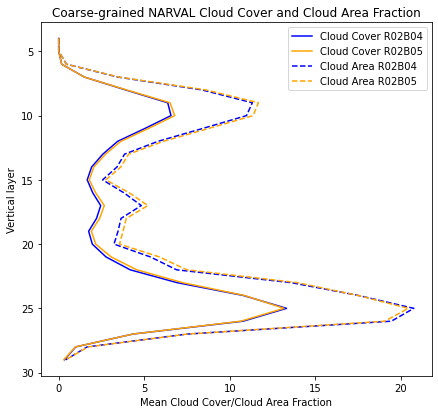

In [132]:
# Not plotting the lower-most layer
a = np.linspace(4, 29, 26)

fig = plt.figure(figsize=(7,6.5))
ax = fig.add_subplot(111, xlabel='Mean Cloud Cover/Cloud Area Fraction', ylabel='Vertical layer', 
                     title='Coarse-grained NARVAL Cloud Cover and Cloud Area Fraction')
ax.plot(cl_cover_R02B04_not_nan_mean[:-1], a, color='blue')
ax.plot(cl_cover_R02B05_not_nan_mean[:-1], a, color='orange')
ax.plot(cl_area_R02B04_not_nan_mean[:-1], a, '--', color='blue')
ax.plot(cl_area_R02B05_not_nan_mean[:-1], a, '--', color='orange')
plt.gca().invert_yaxis()
ax.legend(['Cloud Cover R02B04', 'Cloud Cover R02B05', 'Cloud Area R02B04', 'Cloud Area R02B05'])
fig.savefig('coarse-grained_NARVAL_Cloud_Cover_and_Cloud_Area.pdf')

#### Mean altitude of a vertical layer as y-axis

In [34]:
#Load R02B04 height grids
path_heights_cover_R02B04 = '/pf/b/b309170/my_work/NARVAL/data_var_vertinterp/zg/zg_icon-a_capped.nc'

#Load R02B05 height grids
path_heights_cover_R02B05 = '/pf/b/b309170/my_work/NARVAL/data_var_vertinterp_R02B05/zg/zg_icon-a_capped.nc'

path_heights_cloud_area = '/pf/b/b309170/my_work/NARVAL/grid_extpar/zg_icon-a_capped_upsampled.nc'

In [ ]:
DS = xr.open_dataset(path_heights_cover_R02B04)
heights_cover_R02B04 = DS.zg.values

# Take not_nan entries
not_nan = ~np.isnan(cl_cover_R02B04[0,-1,:])
heights_cover_R02B04 = heights_cover_R02B04[:, not_nan]
heights_cover_R02B04.shape

In [121]:
DS = xr.open_dataset(path_heights_cover_R02B05)
heights_cover_R02B05 = DS.zg.values

# Take not_nan entries
not_nan = ~np.isnan(cl_cover_R02B05[0,-1,:])
heights_cover_R02B05 = heights_cover_R02B05[:, not_nan]
heights_cover_R02B05.shape

(31, 4450)

In [128]:
# The 4887488 points cover exactly the R2B10 NARVAL region
DS = xr.open_dataset(path_heights_cloud_area)
heights_cloud_area = DS.zg.values
heights_cloud_area.shape

(31, 4887488)

In [129]:
heights_cloud_area_mean = np.mean(heights_cloud_area[4:, :], axis=1)
heights_cover_R02B04_mean = np.mean(heights_cover_R02B04[4:, :], axis=1)
heights_cover_R02B05_mean = np.mean(heights_cover_R02B05[4:, :], axis=1)

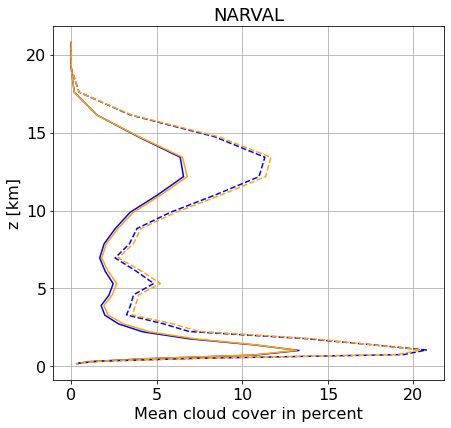

In [24]:
fig = plt.figure(figsize=(7,6.5))
ax = fig.add_subplot(111, xlabel='Mean cloud cover in percent', 
                     ylabel='z [km]', 
                     title='NARVAL')
ax.plot(cl_cover_R02B04_not_nan_mean[:-1], heights_cover_R02B04_mean[:-1]/1000, color='blue')
ax.plot(cl_cover_R02B05_not_nan_mean[:-1], heights_cover_R02B05_mean[:-1]/1000, color='orange')
ax.plot(cl_area_R02B04_not_nan_mean[:-1], heights_cloud_area_mean[:-1]/1000, '--', color='blue')
ax.plot(cl_area_R02B05_not_nan_mean[:-1], heights_cloud_area_mean[:-1]/1000, '--', color='orange')
ax.grid(b=True)
# ax.legend(['Cloud volume fraction R2B4', 'Cloud volume fraction R2B5', 'Cloud area fraction R2B4', 'Cloud area fraction R2B5'])
fig.savefig('coarse-grained_NARVAL_cloud_volume_and_cloud_area_height_vertical.pdf')

#### The values to reproduce the plots

In [23]:
cl_cover_R02B04_not_nan_mean = np.array([2.04788328e-07,3.37767572e-04,1.76278977e-01,1.50058592e+00,3.90944700e+00,6.37033329e+00,6.56155277e+00,5.03742503e+00,3.44565701e+00,2.57724830e+00,1.92405911e+00,1.66570785e+00,1.98510114e+00,2.45446022e+00,2.20961668e+00,1.74880456e+00,1.96377226e+00,2.76433093e+00,4.17553670e+00,6.91707966e+00,1.07888452e+01,1.33122431e+01,1.07748726e+01,4.34056985e+00,9.92240911e-01,3.40039166e-01,0])
cl_cover_R02B05_not_nan_mean = np.array([2.32560647e-07,4.12091632e-04,1.73249361e-01,1.49825045e+00,3.96367678e+00,6.50368543e+00,6.77819485e+00,5.24209089e+00,3.63082348e+00,2.73341333e+00,2.05245366e+00,1.78553704e+00,2.15485129e+00,2.66367587e+00,2.39196284e+00,1.90534969e+00,2.16097192e+00,3.06546465e+00,4.55975366e+00,7.23901038e+00,1.08602627e+01,1.31662217e+01,1.06441334e+01,4.34701875e+00,9.76373480e-01,3.01675391e-01,0])
heights_cover_R02B04_mean = np.array([20784.62706138,19153.33733398,17603.95786796,16133.9516168,14740.62613568,13421.38754175,12174.21248625,10997.08968472,9888.16074232,8845.70287507,7868.11082268,6953.87889022,6101.58467703,5309.87640173,4577.46568938,3903.12723959,3285.70606685,2724.13223735,2217.44252515,1764.80848597,1365.57142071,1019.28704532,725.78754242,485.2795463,298.5262428,167.42931342,0])
heights_cover_R02B05_mean = np.array([20784.146,19152.63,17603.426,16133.51,14740.617,13421.226,12174.089,10997.384,9888.314,8846.011,7868.463,6954.146,6101.87,5310.28,4578.133,3904.0288,3286.9905,2725.754,2219.5645,1767.3948,1368.667,1022.85474,729.8296,489.70505,303.21368,172.30127,0])

cl_area_R02B04_not_nan_mean = np.array([1.55281012e-06,1.59180936e-03,4.52683291e-01,3.46018161e+00,8.37243509e+00,1.13141083e+01,1.09729674e+01,8.41254839e+00,5.80470332e+00,3.84681723e+00,3.40577201e+00,2.56568907e+00,3.80051758e+00,4.82454426e+00,3.64138687e+00,3.46596299e+00,3.23029241e+00,5.36024489e+00,6.88994528e+00,1.35822090e+01,1.75231606e+01,2.07480450e+01,1.94366851e+01,7.52409170e+00,1.66230550e+00,4.14924879e-01,0])
cl_area_R02B05_not_nan_mean = np.array([1.76223934e-06,1.94558191e-03,4.47479165e-01,3.52469534e+00,8.59710765e+00,1.16703107e+01,1.13575835e+01,8.75957598e+00,6.11488521e+00,4.08694226e+00,3.62842462e+00,2.75551589e+00,4.11057480e+00,5.21214155e+00,3.94961260e+00,3.75872047e+00,3.55578789e+00,5.88961924e+00,7.47991944e+00,1.39411644e+01,1.74998017e+01,2.04260154e+01,1.90513188e+01,7.53024746e+00,1.71275558e+00,4.24853374e-01,0])
heights_cloud_area_mean = np.array([20784.725,19153.293,17603.994,16134.034,14740.89,13421.759,12174.814,10998.038,9889.59,8847.808,7871.097,6958.0317,6107.178,5317.237,4586.9204,3914.9941,3300.2566,2741.564,2237.8726,1788.2423,1391.8926,1048.2594,757.0622,518.42236,333.0477,202.89543,0])

In [130]:
print('Cloud Cover\n')
print(cl_cover_R02B04_not_nan_mean[:-1])
print(cl_cover_R02B05_not_nan_mean[:-1])
print(heights_cover_R02B04_mean[:-1])
print(heights_cover_R02B05_mean[:-1])
      
print('Cloud Area\n')
print(cl_area_R02B04_not_nan_mean[:-1])
print(cl_area_R02B05_not_nan_mean[:-1])
print(heights_cloud_area_mean[:-1])
print(heights_cloud_area_mean[:-1])

Cloud Cover

[2.04788328e-07 3.37767572e-04 1.76278977e-01 1.50058592e+00
 3.90944700e+00 6.37033329e+00 6.56155277e+00 5.03742503e+00
 3.44565701e+00 2.57724830e+00 1.92405911e+00 1.66570785e+00
 1.98510114e+00 2.45446022e+00 2.20961668e+00 1.74880456e+00
 1.96377226e+00 2.76433093e+00 4.17553670e+00 6.91707966e+00
 1.07888452e+01 1.33122431e+01 1.07748726e+01 4.34056985e+00
 9.92240911e-01 3.40039166e-01]
[2.32560647e-07 4.12091632e-04 1.73249361e-01 1.49825045e+00
 3.96367678e+00 6.50368543e+00 6.77819485e+00 5.24209089e+00
 3.63082348e+00 2.73341333e+00 2.05245366e+00 1.78553704e+00
 2.15485129e+00 2.66367587e+00 2.39196284e+00 1.90534969e+00
 2.16097192e+00 3.06546465e+00 4.55975366e+00 7.23901038e+00
 1.08602627e+01 1.31662217e+01 1.06441334e+01 4.34701875e+00
 9.76373480e-01 3.01675391e-01]
[20784.62706138 19153.33733398 17603.95786796 16133.9516168
 14740.62613568 13421.38754175 12174.21248625 10997.08968472
  9888.16074232  8845.70287507  7868.11082268  6953.87889022
  6101.58